# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

## Дополнительная часть (необязательная)

Выполнить задания 1-3 для всего набора данных.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

In [1]:
import pandas as pd
import seaborn as sns

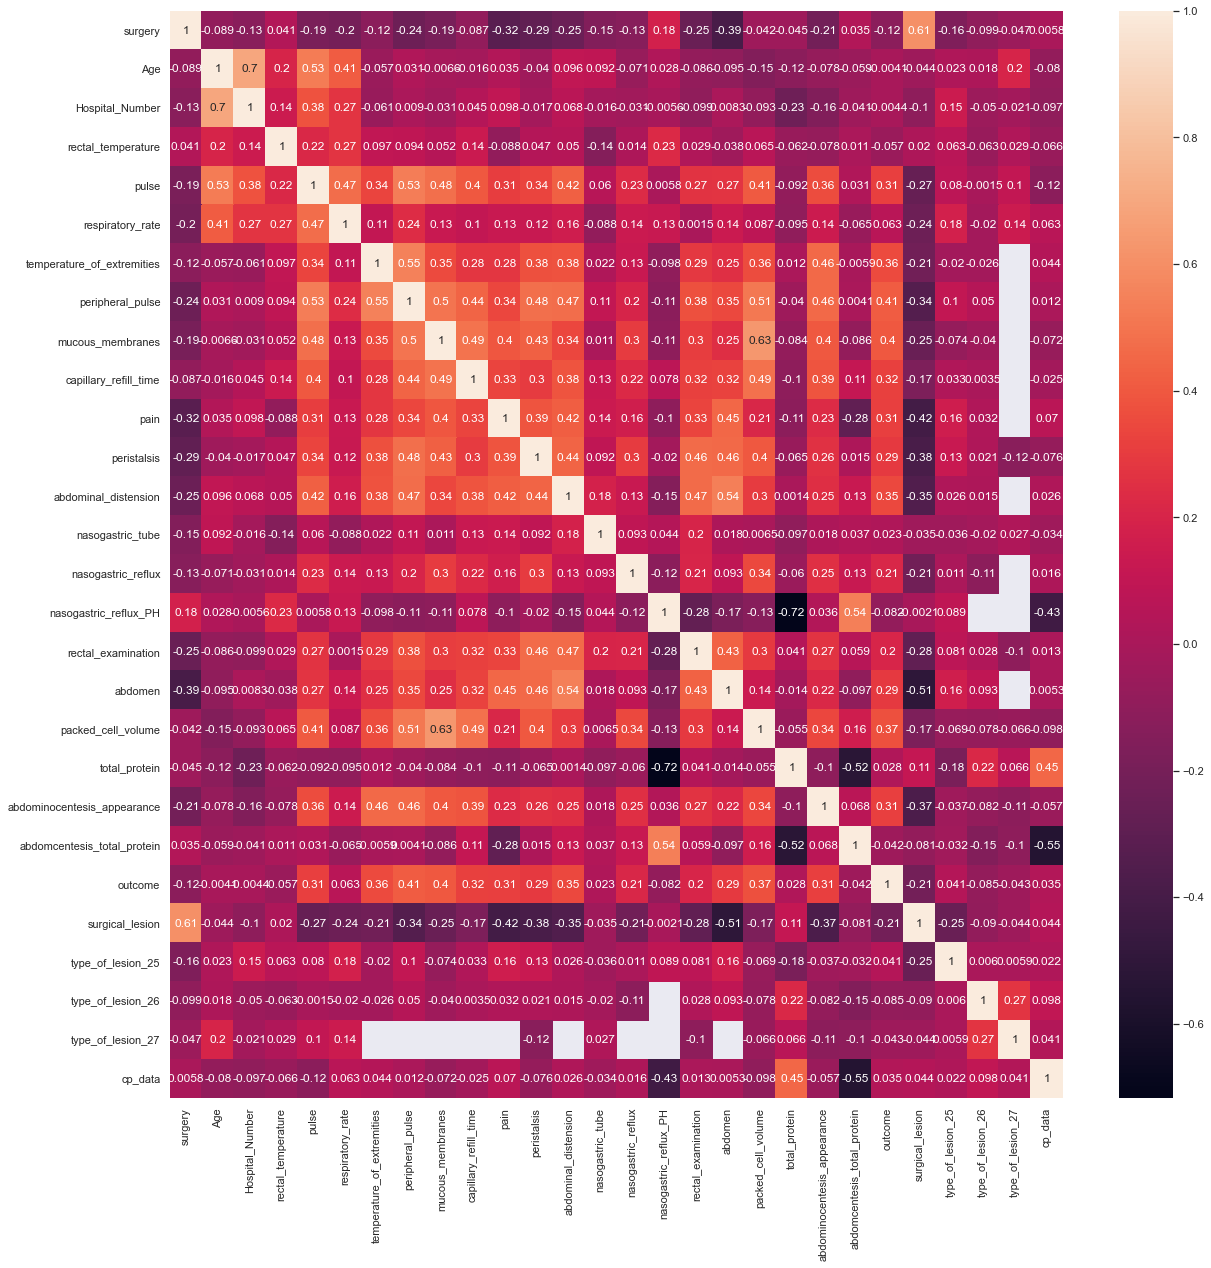

In [8]:
columns = ['surgery','Age','Hospital_Number','rectal_temperature','pulse','respiratory_rate','temperature_of_extremities',
           'peripheral_pulse','mucous_membranes','capillary_refill_time','pain','peristalsis','abdominal_distension',
           'nasogastric_tube','nasogastric_reflux','nasogastric_reflux_PH','rectal_examination','abdomen','packed_cell_volume',
           'total_protein','abdominocentesis_appearance','abdomcentesis_total_protein','outcome',
           'surgical_lesion','type_of_lesion_25','type_of_lesion_26','type_of_lesion_27','cp_data']

goodbye_horses_1 = pd.read_csv('horse_data.csv', names=columns, na_values='?')
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(goodbye_horses_1.corr(), annot=True)

## Задание 1. Базовое изучение

In [3]:
goodbye_horses_2 = goodbye_horses_1[['Hospital_Number','surgery','Age','rectal_temperature','pulse',
                                     'mucous_membranes','rectal_examination','nasogastric_tube','nasogastric_reflux',
                                     'abdominal_distension','outcome']]

for col in goodbye_horses_2.columns:
    pct_missing = goodbye_horses_2[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')
    
goodbye_horses_2.describe()

Hospital_Number - 0.0%
surgery - 0.3%
Age - 0.0%
rectal_temperature - 20.0%
pulse - 8.0%
mucous_membranes - 15.7%
rectal_examination - 34.0%
nasogastric_tube - 34.7%
nasogastric_reflux - 35.3%
abdominal_distension - 18.7%
outcome - 0.3%


,Hospital_Number,surgery,Age,rectal_temperature,pulse,mucous_membranes,rectal_examination,nasogastric_tube,nasogastric_reflux,abdominal_distension,outcome
count,3.000000e+02,299.000000,300.000000,240.000000,276.000000,253.000000,198.000000,196.000000,194.000000,244.000000,299.000000
mean,1.085889e+06,1.397993,1.640000,38.167917,71.913043,2.853755,2.757576,1.755102,1.582474,2.266393,1.551839
std,1.529801e+06,0.490305,2.173972,0.732289,28.630557,1.620294,1.251119,0.649437,0.805359,1.065131,0.737187
min,5.184760e+05,1.000000,1.000000,35.400000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.289040e+05,1.000000,1.000000,37.800000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,5.303055e+05,1.000000,1.000000,38.200000,64.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,5.347275e+05,2.000000,1.000000,38.500000,88.000000,4.000000,4.000000,2.000000,2.000000,3.000000,2.000000
max,5.305629e+06,2.000000,9.000000,40.800000,184.000000,6.000000,4.000000,3.000000,3.000000,4.000000,3.000000


Расчитал базовые метрики

- Пустоты
- Age - категория со значениями 1 и 2, вижу выброс в виде девятки

Больше вроде ничего интересного

## Задание 2. Работа с выбросами

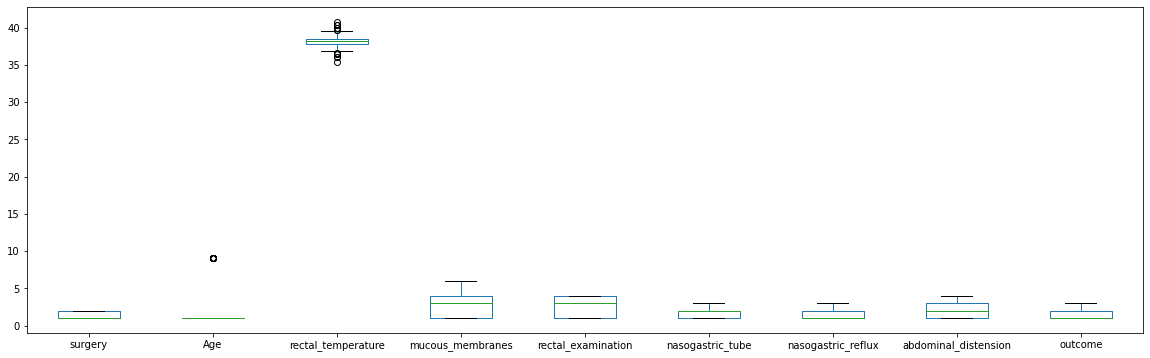

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,6
goodbye_horses_2.drop(['pulse'], axis=1).set_index('Hospital_Number').plot(kind='box')

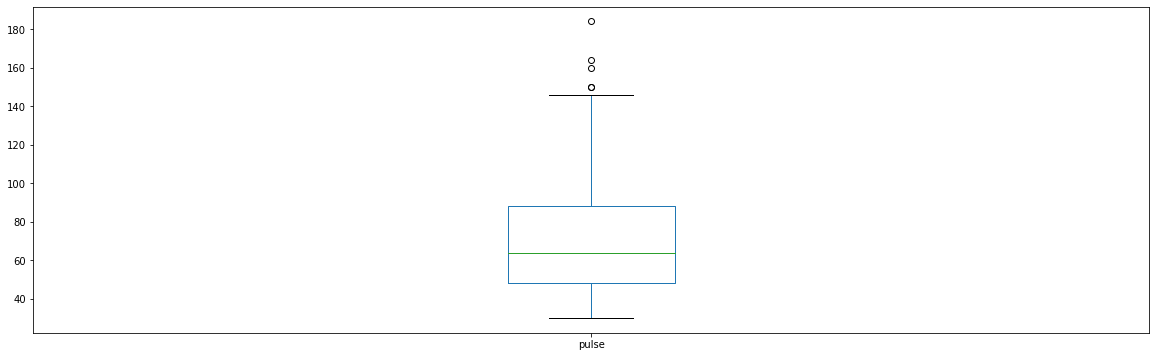

In [5]:
goodbye_horses_2[['Hospital_Number', 'pulse']].set_index('Hospital_Number').plot(kind='box')

- Выброс в возрасте - 100% ошибка ввода.
- У лошадей очень небольшой разброс температуры тела. Поэтому коробочка у графика очень сплюснутая. Точки выброса находятся очень близко к квартилям. Предположу что это температуры лошадей при смерти
- Пульс лошади в состоянии покоя 25-40 уд/мин. 40 ударов находятся до 1 квартиля. В дата сете только больные лошади?

## Задание 3. Работа с пропусками

In [6]:
goodbye_horses_3 = goodbye_horses_2

In [7]:
goodbye_horses_3['Age'].value_counts()

1    276
9     24
Name: Age, dtype: int64

In [15]:
print(id(goodbye_horses_3), id(goodbye_horses_2))

1809606195952 1809606195952


Оказывается в возрасте нету значений 2, но есть 9. Точно ошибка ввода. Заменяю все 9 на 2

In [8]:
goodbye_horses_3.loc[goodbye_horses_3['Age'] == 9, 'Age'] = 2
goodbye_horses_3['Age'].value_counts()

E:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


1    276
2     24
Name: Age, dtype: int64

В колонке surgery не хватает одного значения. 1 строки лишиться не жалко, уберу

In [9]:
goodbye_horses_3.dropna(subset = ['surgery'], inplace=True)
goodbye_horses_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hospital_Number       299 non-null    int64  
 1   surgery               299 non-null    float64
 2   Age                   299 non-null    int64  
 3   rectal_temperature    239 non-null    float64
 4   pulse                 275 non-null    float64
 5   mucous_membranes      252 non-null    float64
 6   rectal_examination    197 non-null    float64
 7   nasogastric_tube      195 non-null    float64
 8   nasogastric_reflux    193 non-null    float64
 9   abdominal_distension  243 non-null    float64
 10  outcome               299 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 28.0 KB


<ipython-input-9-821541835b4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goodbye_horses_3.dropna(subset = ['surgery'], inplace=True)


Посмотрим что там с температурой

In [10]:
goodbye_horses_3['rectal_temperature'].value_counts()

38.0    25
38.5    19
38.3    18
37.8    17
38.2    16
38.6    12
38.1    12
37.5    12
38.4    11
37.6     7
37.7     7
37.2     7
38.7     7
37.9     7
38.8     6
37.3     6
39.2     5
39.3     4
38.9     4
39.5     4
39.0     4
37.4     3
39.4     3
37.1     3
40.3     2
36.5     2
37.0     2
39.1     2
36.0     1
40.0     1
36.4     1
39.9     1
35.4     1
36.9     1
39.6     1
36.1     1
36.8     1
40.8     1
39.7     1
36.6     1
Name: rectal_temperature, dtype: int64

Сильных выбросов не вижу

Построю графики

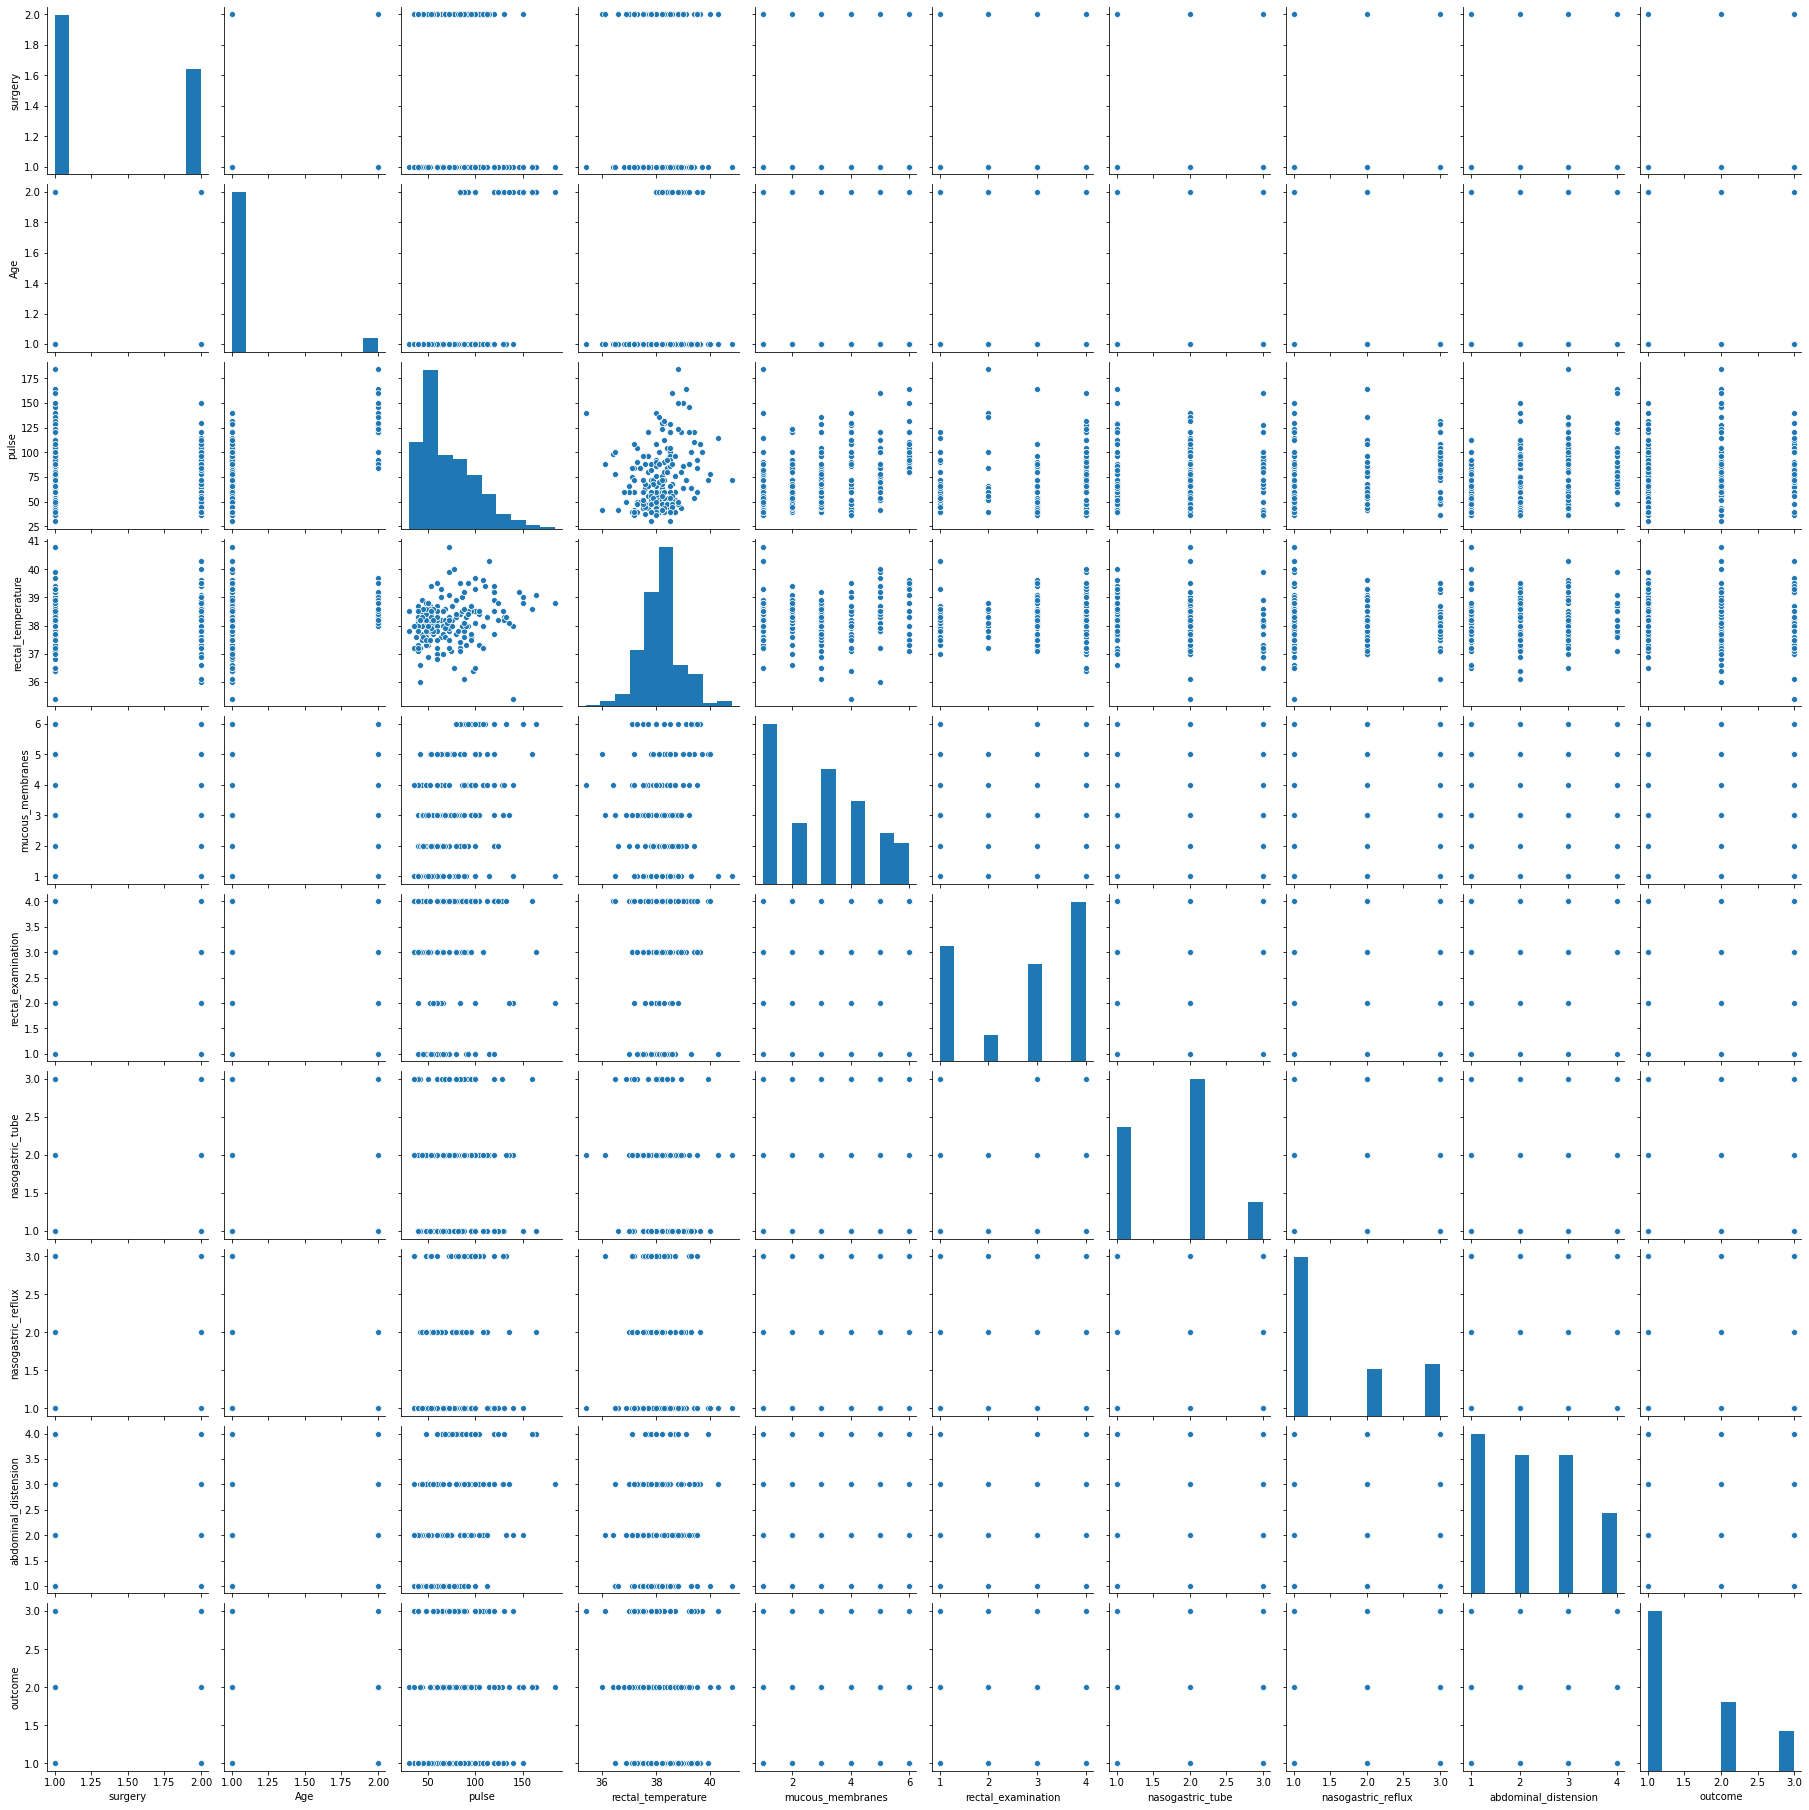

In [11]:
sns.pairplot(goodbye_horses_3.set_index('Hospital_Number'),
             y_vars=['surgery','Age','pulse', 'rectal_temperature',
                                     'mucous_membranes','rectal_examination','nasogastric_tube','nasogastric_reflux',
                                     'abdominal_distension','outcome'],
             x_vars=['surgery','Age','pulse', 'rectal_temperature',
                                     'mucous_membranes','rectal_examination','nasogastric_tube','nasogastric_reflux',
                                     'abdominal_distension','outcome'])

Почитал чуток о заболеваниях лошадей. Понял что выбрал не самые удачные параметры чтобы хоть что-то увидеть. Могу сказать что в контексте тех колонок что я выбрал, пустоты для количественные показатели можно заполнять хоть средним арифметическим, а качественные заполмню модой.

Переделывать работу на других колонках не хотелось бы. Дата сет не шибко интересный, я же не Невзоров

По сути имеем всего 2 количественных колонки rectal_temperature и pulse

In [11]:
goodbye_horses_mean = goodbye_horses_3
goodbye_horses_median = goodbye_horses_3
goodbye_horses_mode = goodbye_horses_3

In [12]:
goodbye_horses_mean.rectal_temperature.fillna(goodbye_horses_mean.rectal_temperature.mean(), inplace=True)

print('rectal_temperature mean')
print(goodbye_horses_mean.rectal_temperature.mean())
print(goodbye_horses_mean.rectal_temperature.median())
print(goodbye_horses_mean.rectal_temperature.mode()[0])
print('')

goodbye_horses_median.rectal_temperature.fillna(goodbye_horses_median.rectal_temperature.median(), inplace=True)

print('rectal_temperature median')
print(goodbye_horses_median.rectal_temperature.mean())
print(goodbye_horses_median.rectal_temperature.median())
print(goodbye_horses_median.rectal_temperature.mode()[0])
print('')

goodbye_horses_mode.rectal_temperature.fillna(goodbye_horses_mode.rectal_temperature.mode(), inplace=True)

print('rectal_temperature mode')
print(goodbye_horses_mode.rectal_temperature.mean())
print(goodbye_horses_mode.rectal_temperature.median())
print(goodbye_horses_mode.rectal_temperature.mode()[0])
print('')

goodbye_horses_mean.pulse.fillna(goodbye_horses_mean.pulse.mean(), inplace=True)

print('pulse mean')
print(goodbye_horses_mean.pulse.mean())
print(goodbye_horses_mean.pulse.median())
print(goodbye_horses_mean.pulse.mode()[0])
print('')

goodbye_horses_median.pulse.fillna(goodbye_horses_median.pulse.median(), inplace=True)

print('pulse median')
print(goodbye_horses_median.pulse.mean())
print(goodbye_horses_median.pulse.median())
print(goodbye_horses_median.pulse.mode()[0])
print('')

goodbye_horses_mode.pulse.fillna(goodbye_horses_mode.pulse.mode(), inplace=True)

print('pulse mode')
print(goodbye_horses_mode.pulse.mean())
print(goodbye_horses_mode.pulse.median())
print(goodbye_horses_mode.pulse.mode()[0])

rectal_temperature mean
38.168619246861994
38.16861924686195
38.16861924686195

rectal_temperature median
38.168619246861994
38.16861924686195
38.16861924686195

rectal_temperature mode
38.168619246861994
38.16861924686195
38.16861924686195

pulse mean
72.0
68.0
72.0

pulse median
72.0
68.0
72.0

pulse mode
72.0
68.0
72.0


E:\Program Files\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Особой разницы нет

rectal_temperature - 20.0%
pulse - 8.0%
mucous_membranes - 15.7%
rectal_examination - 34.0%
nasogastric_tube - 34.7%
nasogastric_reflux - 35.3%
abdominal_distension - 18.7%
outcome - 0.3%

In [13]:
goodbye_horses_3.fillna(goodbye_horses_mode.pulse.median(), inplace=True)
goodbye_horses_3.fillna(goodbye_horses_mode.rectal_temperature.median(), inplace=True)

E:\Program Files\Anaconda\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
for col in goodbye_horses_3.columns:
    pct_missing = goodbye_horses_3[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Hospital_Number - 0.0%
surgery - 0.0%
Age - 0.0%
rectal_temperature - 0.0%
pulse - 0.0%
mucous_membranes - 0.0%
rectal_examination - 0.0%
nasogastric_tube - 0.0%
nasogastric_reflux - 0.0%
abdominal_distension - 0.0%
outcome - 0.0%
